### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_excel('Mizoram.xlsx')

In [3]:
df.head()

,Year,Population,Male,Female
0,1901,82434,39004,43430
1,1911,91204,43028,48176
2,1921,98406,46652,51754
3,1931,124404,59186,65218
4,1941,152786,73855,78931


#### Normalizing the Data

In [4]:
scaler = MinMaxScaler()
df[['Population']] = scaler.fit_transform(df[['Population']])

In [5]:
df1 = df[['Year','Population']]

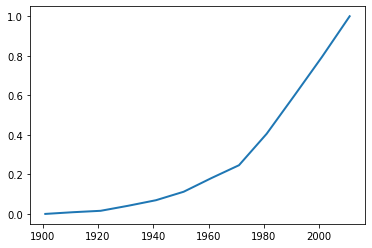

In [6]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)

## Prediction on Population

In [7]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9359652735682934

In [8]:
#training on the whole dataset
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [10]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [11]:
pred

[1.314329101200201, 1.661615227931179, 2.0664691699557807, 2.533603243545258]

In [12]:
dfTest['Population'] = pred


In [13]:
df1 = df1.append(dfTest,ignore_index=True)
df1.tail(5)

,Year,Population
11,2011,1.000000
12,2021,1.314329
13,2031,1.661615
14,2041,2.066469
15,2051,2.533603


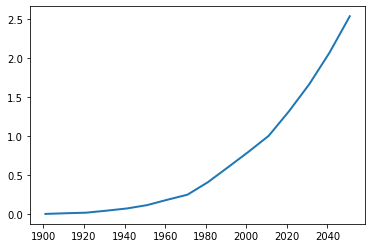

In [14]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)


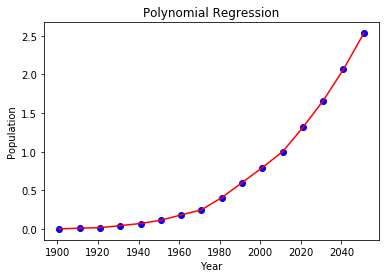

In [15]:
# Visualising the Polynomial Regression results
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show()

### WRT Unproportioned Scale

In [16]:
pred = []
for i in df1['Population']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [17]:
pred

[82434.0,
 91204.0,
 98406.0,
 124404.0,
 152786.0,
 196202.0,
 266063.0,
 332390.0,
 493757.0,
 689756.0,
 888573.0,
 1097206.0,
 1416178.0,
 1768595.0,
 2179429.0,
 2653464.0]

In [18]:
df1['Population'] = pred


In [19]:
df1

,Year,Population
0,1901,82434.0
1,1911,91204.0
2,1921,98406.0
3,1931,124404.0
4,1941,152786.0
5,1951,196202.0
6,1961,266063.0
7,1971,332390.0
8,1981,493757.0
9,1991,689756.0


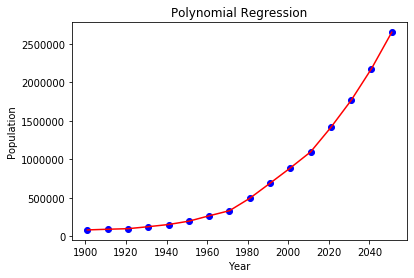

In [20]:
# Visualising the Polynomial Regression results 
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show() 

### Male Population

In [21]:
scaler = MinMaxScaler()
df[['Male']] = scaler.fit_transform(df[['Male']])

In [22]:
df2 = df[['Year','Male']]
df2

,Year,Male
0,1901,0.000000
1,1911,0.007793
2,1921,0.014812
3,1931,0.039087
4,1941,0.067497
5,1951,0.110649
6,1961,0.181008
7,1971,0.255299
8,1981,0.422662
9,1991,0.619702


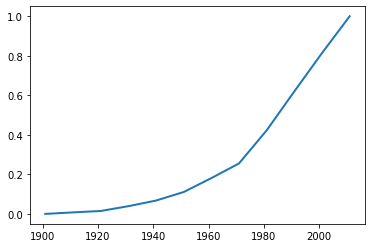

In [23]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)


In [24]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9939345263861615

In [25]:
#training on the whole dataset
X = df2['Year'].values.reshape(-1,1)
y = df2['Male'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [27]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [28]:
pred

[1.3080595173810252, 1.6363409379937366, 2.0146000778577218, 2.446465116339823]

In [29]:
dfTest['Male'] = pred

In [30]:
df2 = df2.append(dfTest,ignore_index=True)
df2

,Year,Male
0,1901,0.000000
1,1911,0.007793
2,1921,0.014812
3,1931,0.039087
4,1941,0.067497
5,1951,0.110649
6,1961,0.181008
7,1971,0.255299
8,1981,0.422662
9,1991,0.619702


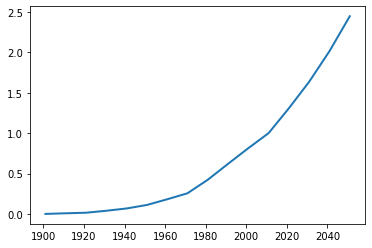

In [31]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)

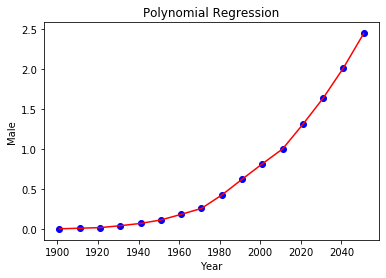

In [32]:
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

#### WRT UNSCALED MALE

In [33]:
pred = []
for i in df2['Male']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [34]:
pred

[39004.0,
 43028.0,
 46652.0,
 59186.0,
 73855.0,
 96136.0,
 132465.0,
 170824.0,
 257239.0,
 358978.0,
 459109.0,
 555339.0,
 714401.0,
 883904.0,
 1079213.0,
 1302200.0]

In [35]:
df2['Male'] = pred
df2

,Year,Male
0,1901,39004.0
1,1911,43028.0
2,1921,46652.0
3,1931,59186.0
4,1941,73855.0
5,1951,96136.0
6,1961,132465.0
7,1971,170824.0
8,1981,257239.0
9,1991,358978.0


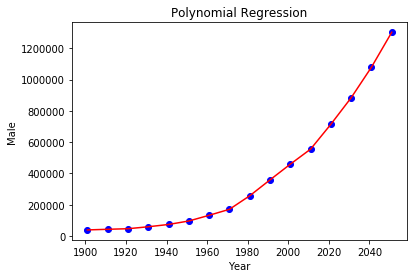

In [36]:
# Visualising the Polynomial Regression results 
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

### Female Population

In [37]:
scaler = MinMaxScaler()
df[['Female']] = scaler.fit_transform(df[['Female']])

In [38]:
df3 = df[['Year','Female']]
df3.head()

,Year,Female
0,1901,0.000000
1,1911,0.009522
2,1921,0.016700
3,1931,0.043713
4,1941,0.071225


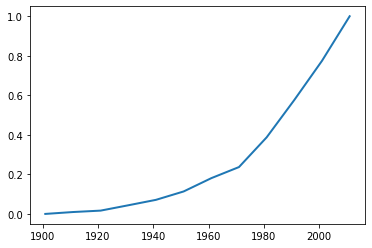

In [39]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

In [40]:
#train-test set creation
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9651311197511365

In [41]:
#train on whole dataset
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [43]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [44]:
pred

[1.3208238140011872, 1.6877970724424358, 2.120200789279579, 2.623870347146976]

In [45]:
dfTest['Female'] = pred

In [46]:
df3 = df3.append(dfTest,ignore_index=True)
df3.tail(5)

,Year,Female
11,2011,1.000000
12,2021,1.320824
13,2031,1.687797
14,2041,2.120201
15,2051,2.623870


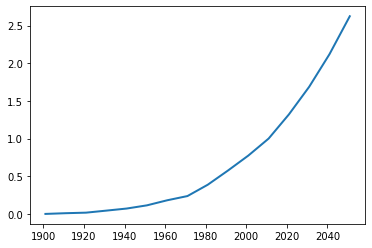

In [47]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

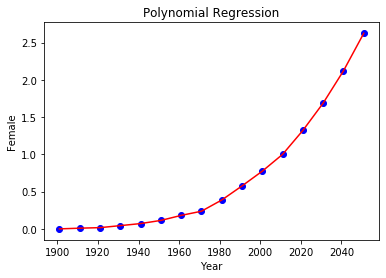

In [48]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

# WRT Unscaled Population

In [49]:
pred = []
for i in df3['Female']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [50]:
pred

[43430.0,
 48176.0,
 51754.0,
 65218.0,
 78931.0,
 100066.0,
 133598.0,
 161566.0,
 236518.0,
 330778.0,
 429464.0,
 541867.0,
 701777.0,
 884691.0,
 1100217.0,
 1351264.0]

In [51]:
df3['Female'] = pred

In [52]:
df3

,Year,Female
0,1901,43430.0
1,1911,48176.0
2,1921,51754.0
3,1931,65218.0
4,1941,78931.0
5,1951,100066.0
6,1961,133598.0
7,1971,161566.0
8,1981,236518.0
9,1991,330778.0


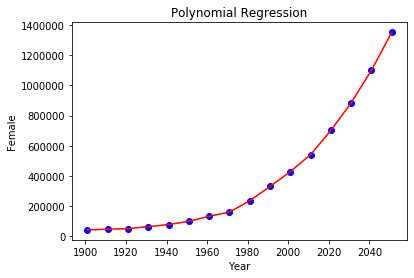

In [53]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

In [54]:
df4 = pd.concat([df1,df2,df3], axis =1)

In [55]:
df4

,Year,Population,Year,Male,Year,Female
0,1901,82434.0,1901,39004.0,1901,43430.0
1,1911,91204.0,1911,43028.0,1911,48176.0
2,1921,98406.0,1921,46652.0,1921,51754.0
3,1931,124404.0,1931,59186.0,1931,65218.0
4,1941,152786.0,1941,73855.0,1941,78931.0
5,1951,196202.0,1951,96136.0,1951,100066.0
6,1961,266063.0,1961,132465.0,1961,133598.0
7,1971,332390.0,1971,170824.0,1971,161566.0
8,1981,493757.0,1981,257239.0,1981,236518.0
9,1991,689756.0,1991,358978.0,1991,330778.0
